### PID Ball Balancer 1-D (Hanan Basheer - 20B030018)

In [308]:
# Importing Libraries
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from ipywidgets import interact

In [309]:
# Defining Cache storage and g
g = 9.8
log1, log2, log3 = [], [], []

def deriv(X, t, theta):
    dX = np.matmul(np.array([[0, 1], [0, 0]]), X) + np.array([0, (-5 * g / 7)])*np.radians(theta)
    return dX

In [310]:
# Achieving setpoint
Xsp = np.array([0, 0])  # position and accelaration

# set initial conditions
theta = 0

# do simulation at fixed time steps dt
dt = 0.1
ti = 0.0
tf = 3.0

# control parameters
g = 9.8
kp = 8
ki = 4
kd = 3

I_initial = 0  # Integral sum

X0 = np.array([10, 5])  # Initial state
X_initial = X0
e_prev = Xsp - X_initial

# starting simulation

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    e = Xsp - X_initial
    I_initial += dt*(e)
    theta -= sum(kp*(e) + ki*I_initial + kd*(e - e_prev)/dt)
    
    # log data and update state
    log1.append(t)
    log2.append(theta)
    log3.append(X_initial)
    X_initial = odeint(deriv,X_initial,[t,t+dt], args=(theta,))[-1]

    # save data for PID calculations
    e_prev = e


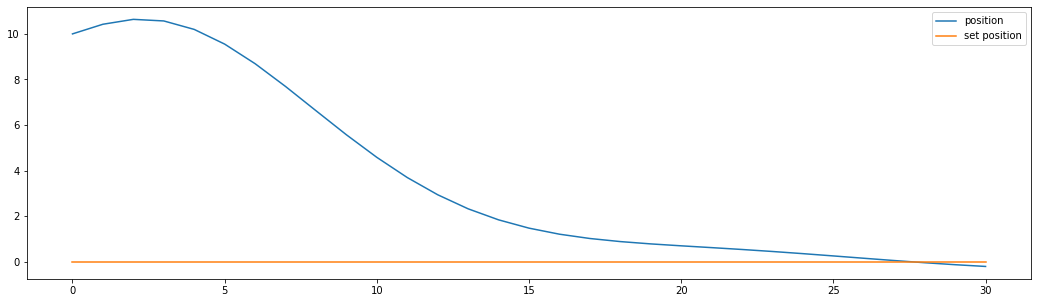

In [311]:
# plotting position
plt.figure(figsize=(18, 5))
plt.plot(np.array(log3)[:, 0], label="position")
plt.plot([Xsp[0] for i in range(len(log1))], label="set position")
plt.legend()

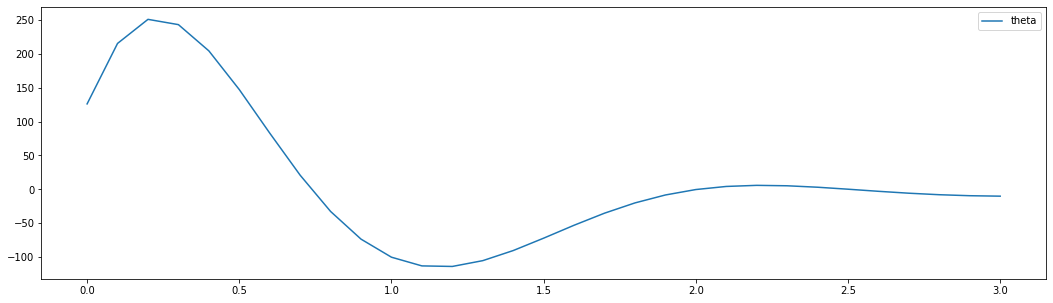

In [312]:
# plotting theta
plt.figure(figsize=(18, 5))
plt.plot(log1, log2, label="theta")
plt.legend()

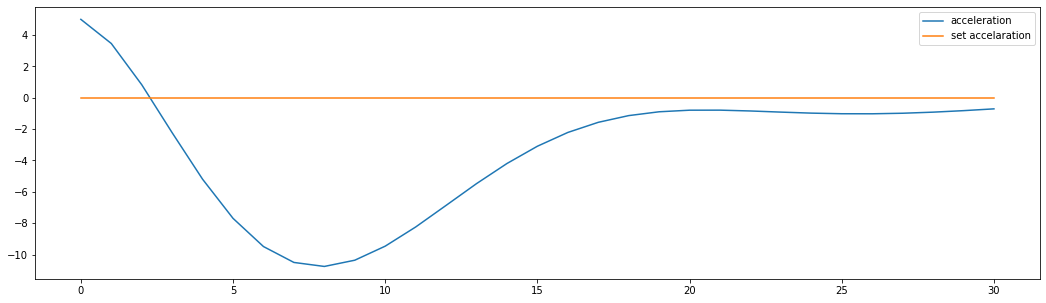

In [313]:
# plotting acceleration
plt.figure(figsize=(18, 5))
plt.plot(np.array(log3)[:, 1], label="acceleration")
plt.plot([Xsp[1] for i in range(len(log1))], label="set accelaration")
plt.legend()